## Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Decision Tree Regressor

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [64]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
fraud[['Undergrad','Marital.Status','Urban']] = fraud[['Undergrad','Marital.Status','Urban']].apply(le.fit_transform)


In [66]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [67]:
y = fraud.iloc[:,2]
x = fraud.iloc[:,[0,1,3,4,5]]

In [68]:
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()
#x = pd.DataFrame(std_scaler.fit_transform(x),columns=x.columns)

In [ ]:
#x

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=21)

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
tree_reg.score(x_test,y_test)*100

-104.47562427013155

In [73]:
result = tree_reg.predict(x_test)

In [74]:
new_data = {'Result':['risky' if x <= 30000 else 'good' for x in result],
        'Actual':['risky' if x <= 30000 else 'good' for x in y_test]}

df = pd.DataFrame(new_data)
df

,Result,Actual
0,good,good
1,good,good
2,good,good
3,good,risky
4,risky,good
...,...,...
175,good,good
176,good,good
177,good,good
178,good,risky


In [75]:
score = 0
for i in range(len(df['Result'])):
    if df['Result'].iloc[i] == df['Actual'].iloc[i]:
        score += 1

In [76]:
(score*100)/180

71.11111111111111

In [ ]:
#tree.plot_tree(tree_reg)

### Decision Tree Classifier

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [23]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [24]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [25]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x14d1926bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x14d19279190>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d1924ba50>],
 'medians': [<matplotlib.lines.Line2D at 0x14d1927a350>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d1927ab50>],
 'means': []}

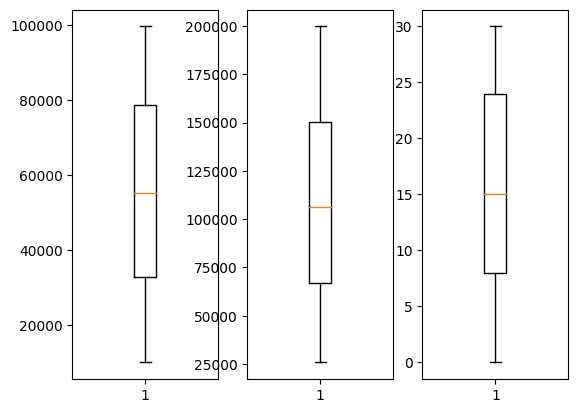

In [27]:
fig, ax = plt.subplots(1, 3)
# draw graph
ax[0].boxplot(fraud['Taxable.Income'])
ax[1].boxplot(fraud['City.Population'])
ax[2].boxplot(fraud['Work.Experience'])


In [33]:
fraud['Fraud_detect'] = [1 if x <= 30000 else 0 for x in fraud['Taxable.Income']]
fraud.head()
#risky : 1
#good : 0

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_detect
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0


In [34]:
fraud = fraud.replace({'YES':1,'NO':0})
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_detect
0,0,Single,68833,50047,10,1,0
1,1,Divorced,33700,134075,18,1,0
2,0,Married,36925,160205,30,1,0
3,1,Single,50190,193264,15,1,0
4,0,Married,81002,27533,28,0,0


In [35]:
fraud = pd.get_dummies(fraud)
fraud.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_detect,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,0,0,0,1
1,1,33700,134075,18,1,0,1,0,0
2,0,36925,160205,30,1,0,0,1,0
3,1,50190,193264,15,1,0,0,0,1
4,0,81002,27533,28,0,0,0,1,0


In [ ]:
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
fraud[['Undergrad','Marital.Status','Urban']] = fraud[['Undergrad','Marital.Status','Urban']].apply(le.fit_transform)
fraud.head()
'''

In [36]:
y = fraud.iloc[:,5]
x = fraud.iloc[:,[0,2,3,4,6,7,8]]


In [ ]:
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()
#x = pd.DataFrame(std_scaler.fit_transform(x),columns=x.columns)
#x

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=21)

In [50]:
tree_reg = DecisionTreeClassifier(criterion='entropy',max_depth=6)
tree_reg.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [51]:
result = tree_reg.predict(x_test)

In [52]:
pd.crosstab(y_test,result)

col_0,0,1
Fraud_detect,,
0,131,14
1,31,4


In [53]:
np.mean(result==y_test)

0.75

In [55]:
new_data = {'Result':['risky' if x == 1 else 'good' for x in result],
        'Actual':['risky' if x == 1 else 'good' for x in y_test]}

df = pd.DataFrame(new_data)
df

,Result,Actual
0,good,good
1,risky,good
2,good,good
3,good,risky
4,good,good
...,...,...
175,good,good
176,good,good
177,good,good
178,good,risky
